In [1]:
#영화 사이트 IMDB의 리뷰 데이터입니다. 
#이 데이터는 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성된 데이터입니다.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb


In [2]:
# 영화 리뷰 데이터를 갖고오겠습니다. 

(X_train, y_train), (X_test, y_test) = imdb.load_data()


17464789/17464789 [==============================] - 3s 0us/step


In [3]:
print(X_test)


[list([1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717])
 list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 10626, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 16873, 19, 861, 1074, 5, 1987, 17975, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 21686, 4378, 270, 235

In [4]:
# 데이터 섹 길이 및 카테고리 확인 

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용  개수 : {}'.format(len(X_test)))

num_class = len(set(y_train))

print('카테고리 : {}'.format(num_class))


훈련용 리뷰 개수 : 25000
테스트용  개수 : 25000
카테고리 : 2


In [5]:
# 첫번째 배열 프린트

print(X_train[0])
print(y_train[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


<function matplotlib.pyplot.show(close=None, block=None)>

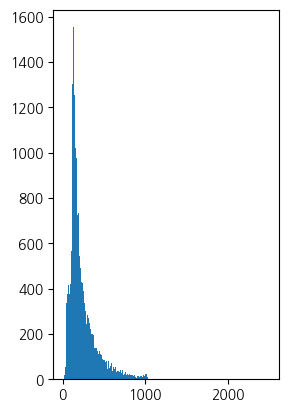

In [6]:
#  25,000개의 훈련용 리뷰의 각 길이는 전부 다른데, 
#    리뷰의 길이 분포를 그래프로 시각화해보겠습니다.

len_result = [len(s) for s in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(len_result)))
print('리뷰의 평균 길이 : {}'.format(np.mean(len_result)))


plt.subplot(1,2,2)
plt.hist(len_result,bins=300)
plt.show



In [7]:
# 긍정/부정 분포 즉 0과1의 분포 확인 

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print('각 레이블에 대한 빈도수 : ')

print(np.asarray((unique_elements,counts_elements)))


각 레이블에 대한 빈도수 : 
[[    0     1]
 [12500 12500]]


In [8]:
# 숫자와 단어 매핑 

word_to_index = imdb.get_word_index()

index_to_word = {}
for key,value in word_to_index.items():
    index_to_word[value+3] = key
    
# 첫번째 리뷰 단어 매핑
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

# <pad>: padding, 길이를 맞출때 사용하는 비어있는(사용x) 토큰
# <sos>: start of sentence, 문장의 시작을 알리는 토큰
# <unk>: unknown, 모델이 인식할 수 없는 토큰



    
    

1641221/1641221 [==============================] - 0s 0us/step


In [9]:
print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

In [10]:
# 모형 만들기 
#우선 필요한 패키지를 가져옵니다.

import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model


In [11]:
vocab_size = 1000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)


In [12]:
# 패딩하기
# pad_sequences() 활용. 길이는 max_len에 넣는 값으로 정해집니다. 훈련 데이터가 정한 길이를 초과하면 초과분을 삭제하고, 부족하면 0으로 채웁니다.
# 패딩은 컨볼루션 연산을 수행하기 전에 입력 이미지의 크기를 조정하는 방법
# 패딩을 하면 이미지의 크기가 커지므로, 필터가 이미지를 모두 커버할 수 있고 특징을 더 잘 추출할 수 있습니다

max_len = 500
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


In [13]:
# Embedding()은 두 개의 인자를 받는데, 첫번째 인자는 단어 집합의 크기이며 
# 두번째 인자는 임베딩 후의 벡터 크기입니다. 여기서는 100을 선택했습니다. 
# 즉, 입력 데이터에서 모든 단어는 100차원의 임베딩 벡터로 표현됩니다.

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))


In [14]:
#### 얼리스톱과 체크 포인터 설정
# 검증 데이터의 손실(loss)이 증가하면, 과적합 징후이므로 검증 데이터 손실이 4회 증가하면 
# 학습을 중단하는 조기 종료(EarlyStopping)를 사용합니다. 
# 또한, ModelCheckpoint를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우에만 모델을 저장하도록 합니다.

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)


In [15]:
# 옵티마이저 및 로스펑션 설정
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

# 긍정인지 부정인지에 대한 이진 판별값이 출력이 되기 때문에, 손실 함수는 binary_crossentropy를 사용합니다. 
# 최적화 함수는 rmsprop를 사용하였습니다. 또한, 에포크마다 정확도를 구하기위해 accuracy를 추가해줍니다.
# 에포크는 총 10회를 수행하겠습니다.


Epoch 1/15


2023-10-04 21:35:57.026124: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


334/334 [==============================] - ETA: 0s - loss: 0.5456 - acc: 0.7157
Epoch 1: val_acc improved from -inf to 0.80500, saving model to GRU_model.h5
334/334 [==============================] - 131s 389ms/step - loss: 0.5456 - acc: 0.7157 - val_loss: 0.4298 - val_acc: 0.8050
Epoch 2/15
334/334 [==============================] - ETA: 0s - loss: 0.4152 - acc: 0.8181
Epoch 2: val_acc improved from 0.80500 to 0.84080, saving model to GRU_model.h5
334/334 [==============================] - 130s 389ms/step - loss: 0.4152 - acc: 0.8181 - val_loss: 0.3764 - val_acc: 0.8408
Epoch 3/15
334/334 [==============================] - ETA: 0s - loss: 0.3669 - acc: 0.8458
Epoch 3: val_acc improved from 0.84080 to 0.85700, saving model to GRU_model.h5
334/334 [==============================] - 132s 395ms/step - loss: 0.3669 - acc: 0.8458 - val_loss: 0.3574 - val_acc: 0.8570
Epoch 4/15
334/334 [==============================] - ETA: 0s - loss: 0.3178 - acc: 0.8696
Epoch 4: val_acc improved from 0.85

In [ ]:
# 조기종료 모델 불러 오기
# . 훈련이 다 되었다면 이제 테스트 데이터에 대해서 정확도를 평가할 차례입니다. 
#   훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드합니다.

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))


In [17]:
# 조기종료 모델 불러 오기
# . 훈련이 다 되었다면 이제 테스트 데이터에 대해서 정확도를 평가할 차례입니다. 
#   훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드합니다.

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))


571/782 [====================>.........] - ETA: 14s - loss: 0.2964 - acc: 0.8801